## Code to generate Figure 1 graphics
For each peptide simulation, merged replicate trajectories were analyzed using 'soursop' to determine per-frame phi and psi angles for the central phosphoresidue. This notebook reads in the text files from /data containing phi [0] and psi [1] angles for all trajectory frames. In this naming scheme, 'pS1' is phosphoserine with -1 parameters, 'pS2' is phosphoserine with -2 parameters, etc. 

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
## load phi-psi angle data from all simulations and organize ##

c36_pS1 = np.loadtxt('data/pS-c36-1_phipsi.txt')
c36_pS2 = np.loadtxt('data/pS-c36-2_phipsi.txt')
c36_pT1 = np.loadtxt('data/pT-c36-1_phipsi.txt')
c36_pT2 = np.loadtxt('data/pT-c36-2_phipsi.txt')

opls_pS1 = np.loadtxt('data/pS-opls-1_phipsi.txt')
opls_pS2 = np.loadtxt('data/pS-opls-2_phipsi.txt')
opls_pT1 = np.loadtxt('data/pT-opls-1_phipsi.txt')
opls_pT2 = np.loadtxt('data/pT-opls-2_phipsi.txt')

pS1 = [opls_pS1, c36_pS1]
pS2 = [opls_pS2, c36_pS2]
pT1 = [opls_pT1, c36_pT1]
pT2 = [opls_pT2, c36_pT2]

all_data = [pS1, pS2, pT1, pT2]
labels = ['pS1', 'pS2', 'pT1', 'pT2']

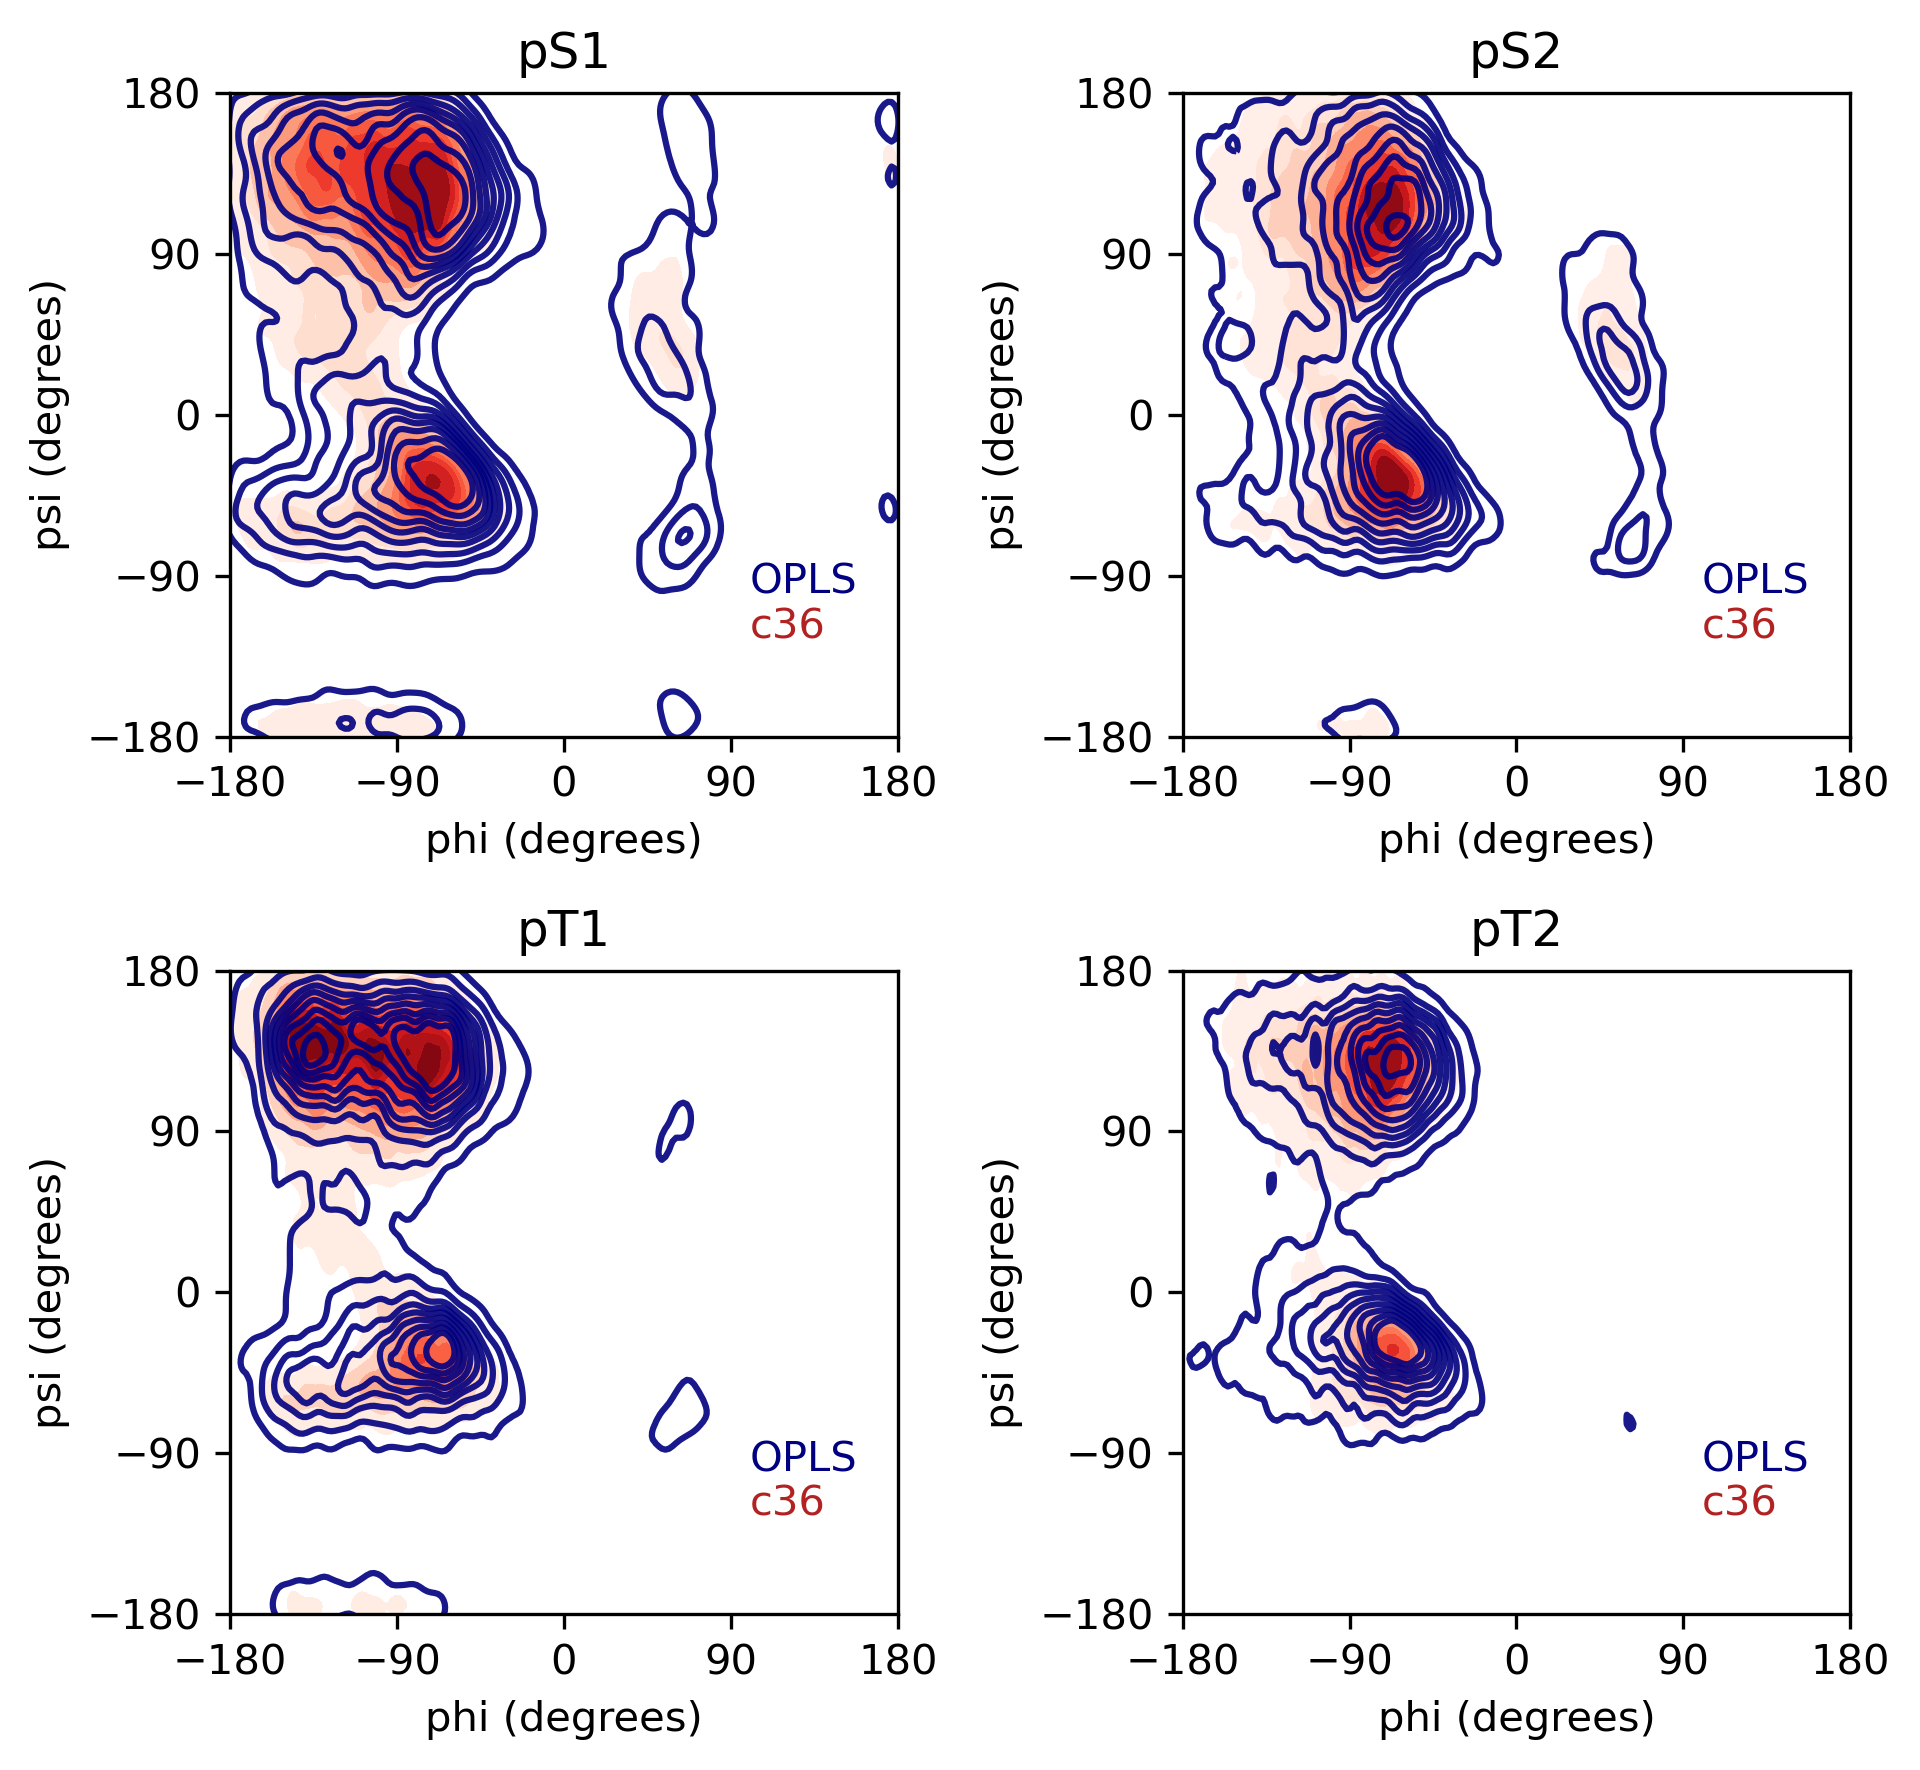

In [45]:
## generate Ramachandran plot overlays to compare force fields (OPLS vs. CHARMM36 (c36)) (PANEL C) ##
fig, axes = plt.subplots(2, 2, figsize = (6.5, 6), dpi = 300)
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    opls = all_data[i][0]
    c36 = all_data[i][1]
    label = labels[i]
    sns.kdeplot(ax = axes[i], x = opls[:,0], y = opls[:,1], fill = False, color = 'navy', alpha = 0.9, bw_adjust = 0.4)
    sns.kdeplot(ax = axes[i], x = c36[:,0], y = c36[:,1], fill = True, cmap = "Reds", bw_adjust = 0.4)
    ax.set_title(label)
    ax.set_ylabel('psi (degrees)')
    ax.set_xlabel('phi (degrees)')
    ax.set_xlim([-180, 180])
    ax.set_ylim([-180, 180])
    ax.annotate('c36', xy = (100, -125), color = 'firebrick')
    ax.annotate('OPLS', xy = (100, -100), color = 'navy')
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-180, -90, 0, 90, 180])
fig.tight_layout()

plt.savefig('ramachandran_maps_1C.pdf', format = 'pdf', dpi = 300)

plt.show()